# CIFAR100 CNN Keras Sequential
## Setup

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from keras.layers import Input, Flatten, Dense, Activation, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import cifar100

## Load CIFAR100 Dataset

In [5]:
(x_train, y_train),(x_test, y_test) = cifar100.load_data()

## Check number of categories present in the dataset

In [6]:
num_labels = len(np.unique(y_train))
num_labels

100

## Convert categories to one-hot vectors

In [7]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Normalize

In [8]:
image_size = x_train.shape[1]
input_size = image_size * image_size * 3
# Normalize
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

## Set Hyperparameters

In [9]:
batch_size = 64 # Arbitrary 2^n
hidden_units = 128
dropout = 0.5 # Determines the probability of allowing signals to go through an activation layer

## Build Model

In [10]:
model = Sequential()
model.add(Conv2D(64, 3, padding='same', input_shape=(image_size, image_size, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, 3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2))
model.add(Dropout(0.5))

model.add(Conv2D(128, 3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, 3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2))
model.add(Dropout(0.5))

model.add(Conv2D(256, 3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, 3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 activation (Activation)     (None, 32, 32, 64)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 32, 32, 64)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                        

## Train Data

In [11]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [12]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 40, batch_size = batch_size)

Epoch 1/40
782/782 [==============================] - 14s 15ms/step - loss: 4.0898 - accuracy: 0.0920 - val_loss: 3.5155 - val_accuracy: 0.1678
Epoch 2/40
782/782 [==============================] - 11s 14ms/step - loss: 3.2835 - accuracy: 0.2006 - val_loss: 2.8223 - val_accuracy: 0.2933
Epoch 3/40
782/782 [==============================] - 11s 14ms/step - loss: 2.8200 - accuracy: 0.2856 - val_loss: 2.5230 - val_accuracy: 0.3455
Epoch 4/40
782/782 [==============================] - 11s 14ms/step - loss: 2.5615 - accuracy: 0.3391 - val_loss: 2.1669 - val_accuracy: 0.4192
Epoch 5/40
782/782 [==============================] - 11s 14ms/step - loss: 2.3748 - accuracy: 0.3769 - val_loss: 2.0543 - val_accuracy: 0.4395
Epoch 6/40
782/782 [==============================] - 11s 14ms/step - loss: 2.2317 - accuracy: 0.4072 - val_loss: 2.0126 - val_accuracy: 0.4556
Epoch 7/40
782/782 [==============================] - 11s 14ms/step - loss: 2.1159 - accuracy: 0.4316 - val_loss: 2.0536 - val_accuracy:

## Plot results

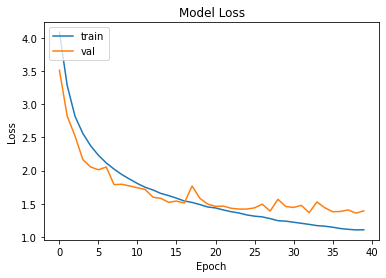

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train','val'],loc='upper left')
plt.show()